<h1 style="color: #3465A4; font-family: 'Arial'; text-align: center;">Analyse et Prédiction des Genres Musicaux</h1>

<p style="font-family: 'Verdana'; font-size: 14px; text-align: justify;">
Dans ce projet, nous explorons le monde des genres musicaux à travers une analyse détaillée d'un dataset riche et varié. Disponible sur 
<a href="https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre" target="_blank">Kaggle</a>, ce dataset offre une fenêtre sur la diversité et la complexité de la musique, présentant une opportunité unique d'appliquer et de comparer différents algorithmes de machine learning pour la prédiction des genres musicaux.
</p>

<h2 style="color: #204A87;">Objectifs du Projet</h2>

<p style="font-family: 'Verdana'; font-size: 14px;">
Notre exploration se déroulera en plusieurs étapes clés, chacune visant à mieux comprendre les caractéristiques qui définissent et différencient les genres musicaux. À travers l'utilisation de techniques avancées telles que le <strong>K-means clustering</strong>, la <strong>classification hiérarchique</strong>, le <strong>spectral clustering</strong> , l'analyse en composantes principales (<strong>ACP</strong>), et l'analyse en composantes Canoniques (<strong>ACC</strong>), nous cherchons à révéler les patterns cachés au sein de ce dataset et à prédire avec précision le genre de morceaux de musique inédits.
</p>

<h2 style="color: #204A87;">Visualisation et Analyse</h2>

<p style="font-family: 'Verdana'; font-size: 14px;">
Nous allons également plonger dans des visualisations de données captivantes, permettant une compréhension plus intuitive des dynamiques à l'œuvre. Préparez-vous à découvrir des insights fascinants sur ce qui fait qu'une chanson appartient à un certain genre et comment des algorithmes de machine learning peuvent déchiffrer ces subtilités.
</p>

<h2 style="color: #204A87;">Pourquoi ce Dataset ?</h2>

<p style="font-family: 'Verdana'; font-size: 14px;">
Choisir ce dataset n'était pas anodin. Il représente un challenge attrayant de par sa complexité et la richesse de ses features, offrant une toile parfaite pour appliquer nos techniques de data science. De plus, la musique, en tant que forme d'art universelle, offre un terrain d'expérimentation passionnant pour l'analyse de données et l'apprentissage automatique.
</p>


<ul style="color:rgb(105,105,105); font-family: 'Arial';">
    <li>M1MIAA - Réalisé par:</li>
    <li>Marwane RACHAD</li>
    <li>Mouheb FELLI</li>
    <li>Rami GOUAL</li>
</ul>


## <span style="color:rgb(25,25,112)">Import des bibliotheques</span>


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import datasets
import seaborn as sns
%matplotlib inline

## <span style="color:rgb(25,25,112)">Import du fichier CSV</span>


In [2]:
df = pd.read_csv('music_genre.csv', header=0)

**Premières 5 lignes de notre DataFrame**

In [3]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


**Info sur les colonnes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

**Obtenir des statistiques de base sur les données <span style="color:red">numériques</span> :**

In [5]:
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


**Obtenir des statistiques de base sur les données <span style="color:red">qualitatives</span> :**

In [6]:
df.describe(include = object)

,artist_name,track_name,key,mode,tempo,obtained_date,music_genre
count,50000,50000,50000,50000,50000,50000,50000
unique,6863,41699,12,2,29394,5,10
top,empty_field,Home,G,Major,?,4-Apr,Electronic
freq,2489,16,5727,32099,4980,44748,5000


> Les valeurs `empty_field` et `?` dans le dataset sont traitées comme des chaînes valides au lieu de valeurs manquantes, nécessitant leur conversion en `NaN` pour une gestion correcte.

## <span style="color:rgb(25,25,112)">Préparation de données</span>


**Compte du nombre de valeurs manquantes par colonne (<span style="color:green">avant</span> remplacement de <span style="color:red">empty_field</span> et <span style="color:red">?</span>)**

In [7]:
df.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

**Remplacement de <span style="color:red">empty_field</span> et <span style="color:red">?</span>**

In [8]:
df.replace(['empty_field', '?'], np.nan, inplace=True)

**Compte du nombre de valeurs manquantes par colonne (<span style="color:green">après</span> remplacement de <span style="color:red">empty_field</span> et <span style="color:red">?</span>)**

In [9]:
df.isnull().sum()

instance_id            5
artist_name         2494
track_name             5
popularity             5
acousticness           5
danceability           5
duration_ms            5
energy                 5
instrumentalness       5
key                    5
liveness               5
loudness               5
mode                   5
speechiness            5
tempo               4985
obtained_date          5
valence                5
music_genre            5
dtype: int64

**Remplacement sur les données <span style="color:red">numériques</span> :**

In [10]:
# Création d'un impute pour remplacer les valeurs manquantes des colonnes numériques
imputer_num = SimpleImputer(strategy="median")

# Sélection
numerical_cols = df.select_dtypes(include=['float64']).columns

# Application de l'impute sur les colonnes numériques
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])


**Remplacement sur les données <span style="color:red">qualitatives/catégoriels</span> :**

In [11]:
# Création d'un impute pour les attributs catégoriels
imputer_cat = SimpleImputer(strategy="most_frequent")

# Sélection
categorical_cols = df.select_dtypes(include=['object']).columns

# Application de l'impute sur les colonnes catégorielles
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


**Supprimer `music_genre`, pour que le modèle ne soit pas influencé par cette colonne**

In [12]:
# Supprimer la colonne 'music_genre' et la stocker dans une variable séparée
labels = df['music_genre'].copy()
df = df.drop('music_genre', axis=1)


**Suppression des Colonnes Inutiles**


In [13]:
df.drop(['artist_name', 'track_name', 'obtained_date'], axis=1, inplace=True)

**Convertir tempo en Type Numérique**

In [14]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')

>La colonne `tempo` contient des valeurs numériques, mais elle est stockée en tant que type objet,

**Encodage des Données Catégorielles**

In [15]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,32894.0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,...,0,0,0,0,0,0,0,0,0,1
1,46652.0,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,...,0,0,1,0,0,0,0,0,0,1
2,30097.0,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,...,0,0,0,0,0,0,0,0,1,0
3,62177.0,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,...,0,1,0,0,0,0,0,0,0,0
4,24907.0,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,...,0,0,0,0,0,0,1,0,0,0


> l'encodage One-Hot créera une nouvelle colonne pour chaque catégorie unique des données catégorielles, avec des 1 et des 0 indiquant la présence d'une catégorie pour chaque observation 

**Standardisation des données numériques**

In [16]:
# Création d'un objet StandardScaler
scaler = StandardScaler()

# Application de la standardisation aux caractéristiques numériques
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

>La standardisation des données numériques assure que chaque caractéristique contribue équitablement au modèle, évitant ainsi que les variables à grande échelle dominent indûment le processus d'analyse.

**Préparation des datasets pour tous les models**

In [17]:
# Créeation de copie profonde du DataFrame :
df_CAH = df.copy(deep=True)
df_SPEC = df.copy(deep=True)
df_ACP = df.copy(deep=True)
df_ACC = df.copy(deep=True)

## <span style="color:rgb(25,25,112)">K-means model</span>

**Nombre de clusters**

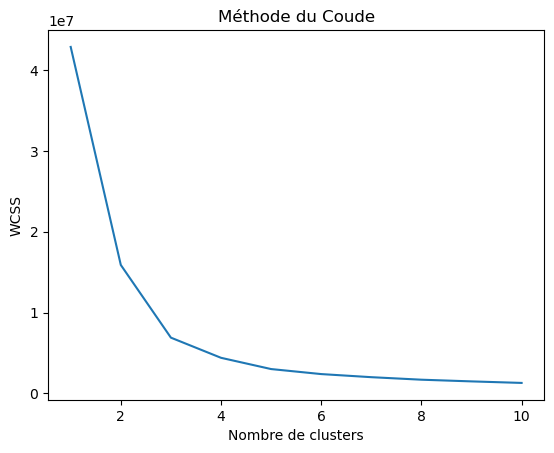

In [18]:
# utilisation de la méthode du coude pour trouver le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

>Le coude se situe autour de 2 ou 3 clusters, où la courbe commence à s'aplatir.

**K-means**

In [19]:
k_optimal = 3 #selon le graphique

# Application de K-means avec le nombre de clusters choisi
kmeans_final = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
kmeans_final.fit(df)

# Les étiquettes de cluster pour chaque point de données
clusters = kmeans_final.labels_

df['Cluster_Labels'] = clusters

**Distribution des Genres Musicaux par Cluster**

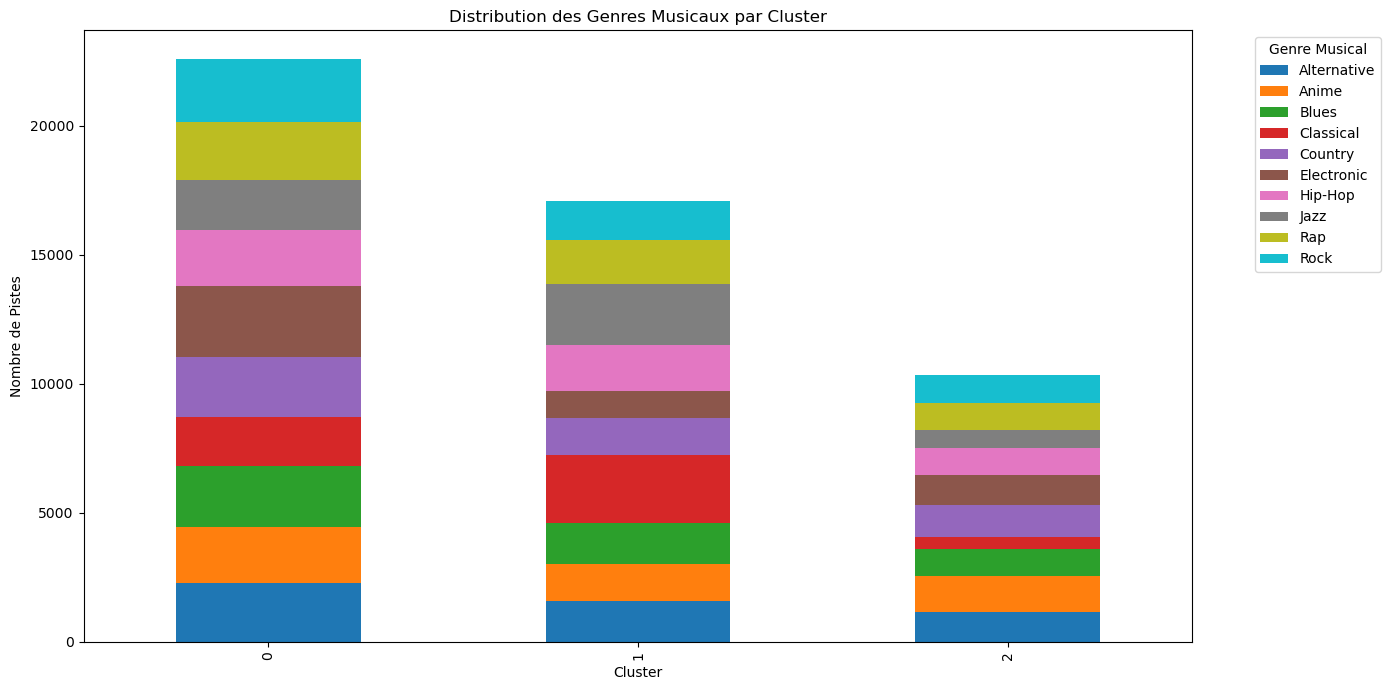

In [20]:
# labels' contient vos genres musicaux et que 'clusters' contient les étiquettes de clusters
visualization_df = pd.DataFrame({'Cluster_Labels': clusters, 'Music_Genre': labels})

# Créer un tableau croisé pour compter les genres par cluster
cluster_genre_counts = pd.crosstab(visualization_df['Cluster_Labels'], visualization_df['Music_Genre'])

# Utiliser un graphique à barres empilées pour visualiser les résultats
cluster_genre_counts.plot(kind='bar', stacked=True, figsize=(14, 7))

# Ajouter des titres et des légendes
plt.title('Distribution des Genres Musicaux par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre de Pistes')
plt.legend(title='Genre Musical', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()


**Score Silhouette**

In [21]:
silhouette_avg = silhouette_score(df.drop('Cluster_Labels', axis=1), df['Cluster_Labels'])
print(f"Le score moyen de silhouette est : {silhouette_avg}")


Le score moyen de silhouette est : 0.5540550990163203


>Avec un score moyen de silhouette de 0.554, l'algorithme K-means a formé des clusters bien définis, indiquant une bonne séparation entre les clusters et une cohérence interne satisfaisante. Ce score suggère que les points sont généralement bien groupés.

<ul>
    <li>k=2  : 0.5250511154850809</li>
    <li style="color:green">k=3  : 0.5540550990163203</li>
    <li>k=4  : 0.5233961290457287</li>
    <li>k=5  : 0.5047728852899933</li>
    <li>k=10 : 0.4030517955757374</li>
</ul>


## <span style="color:rgb(25,25,112)">Matrice de confusion</span>

**Rajouter les genres musicaux au DataFrame**

In [22]:
df['music_genre'] = labels

**Nombre de titres dans chaque cluster par genre musical**

In [23]:
# Créer un DataFrame qui combine les labels de clusters et les genres musicaux
combined_df = pd.concat([df['Cluster_Labels'], labels], axis=1)

# la répartition des genres par cluster
genre_by_cluster = pd.crosstab(combined_df['Cluster_Labels'], combined_df['music_genre'])

# Affichage
genre_by_cluster.head()


music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
Cluster_Labels,,,,,,,,,,
0,2272,2181,2376,1868,2352,2737,2167,1955,2256,2406
1,1575,1430,1592,2648,1419,1075,1782,2362,1707,1498
2,1158,1389,1032,484,1229,1188,1051,683,1037,1096


> Pour chaque cluster, on prend le genre musical le plus représenté comme étiquette pour ce cluster. Cela va nous aider à construire un dictionnaire de mappage qui pourra ensuite être utilisé pour comparer les étiquettes de cluster avec les genres musicaux réels.

**Etape 1: Mappage**

In [24]:
# Les genres les plus fréquents dans chaque cluster. (voir Out[25])
cluster_to_genre = {
    0: 'Electronic',
    1: 'Classical',
    2: 'Anime'
}

**Etape 2: Attribution des Genres Prédits selon le Mappage**

In [25]:
predicted_genres = [cluster_to_genre[cluster] for cluster in clusters]

**Etape 3: Création de la Matrice de Confusion**

In [26]:
from sklearn.metrics import confusion_matrix
import pandas as pd

true_genres = df['music_genre'][df.index]

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(true_genres, predicted_genres, labels=list(cluster_to_genre.values()))

# Créer le DataFrame pour la matrice de confusion pour une meilleure lisibilité
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=cluster_to_genre.values(),  # Les genres musicaux réels (prédits) comme index
    columns=cluster_to_genre.values()  # Les genres musicaux prédits comme colonnes
)

print(conf_matrix_df)


            Electronic  Classical  Anime
Electronic        2737       1075   1188
Classical         1868       2648    484
Anime             2181       1430   1389


<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body { font-family: Arial, sans-serif; margin: 20px; }
        table { border-collapse: collapse; width: 60%; }
        table, th, td { border: 1px solid black; }
        th, td { padding: 8px; text-align: left; }
        th { background-color: #f2f2f2; }
    </style>
</head>
<body>
    <h2 style="color:rgb(25,25,112)"> Interprétation du Clustering des Genres Musicaux</h2>
    <p>
        Dans notre étude, nous avons associé à chaque cluster, un genre musical spécifique en fonction du genre le plus fréquent
        au sein du cluster. Les genres musicaux considérés étaient "Electronic", "Classical", et "Anime".
    </p>
    <p>
        La matrice de confusion suivante montre comment les morceaux de musique ont été classés dans les clusters
        et comment ces clusters ont été mappés aux genres musicaux prédits :
    </p>
    <table>
        <tr>
            <th>Genre Réel / Prédit</th>
            <th>Electronic</th>
            <th>Classical</th>
            <th>Anime</th>
        </tr>
        <tr>
            <td>Electronic</td>
            <td>2737</td>
            <td>1075</td>
            <td>1188</td>
        </tr>
        <tr>
            <td>Classical</td>
            <td>1868</td>
            <td>2648</td>
            <td>484</td>
        </tr>
        <tr>
            <td>Anime</td>
            <td>2181</td>
            <td>1430</td>
            <td>1389</td>
        </tr>
    </table>
    <p>
        L'analyse de cette matrice révèle que le modèle a relativement bien performé pour classifier les morceaux
        "Electronic" et "Classical". Cependant, il y a eu des confusions notables, notamment entre "Electronic"
        et "Anime", ainsi qu'entre "Electronic" et "Classical".
    </p>
    <h3 style="color:rgb(25,25,112)">Exemple "Electronic"</h3>
    <ul>
        <li>2737 morceaux "Electronic" ont été correctement prédits comme "Electronic".</li>
        <li>1075 morceaux "Electronic" ont été prédits à tort comme "Classical".</li>
        <li>1188 morceaux "Electronic" ont été prédits à tort comme "Anime".</li>
    </ul>

</body>
</html>


## <span style="color:rgb(25,25,112)">Classification Hiérarchique</span>

**Création d'un sous-ensemble de données**

In [27]:
# Sous-ensemble aléatoire de 3500 instances
df_sample = df_CAH.sample(n=3500, random_state=42)

**Dendrogramme**

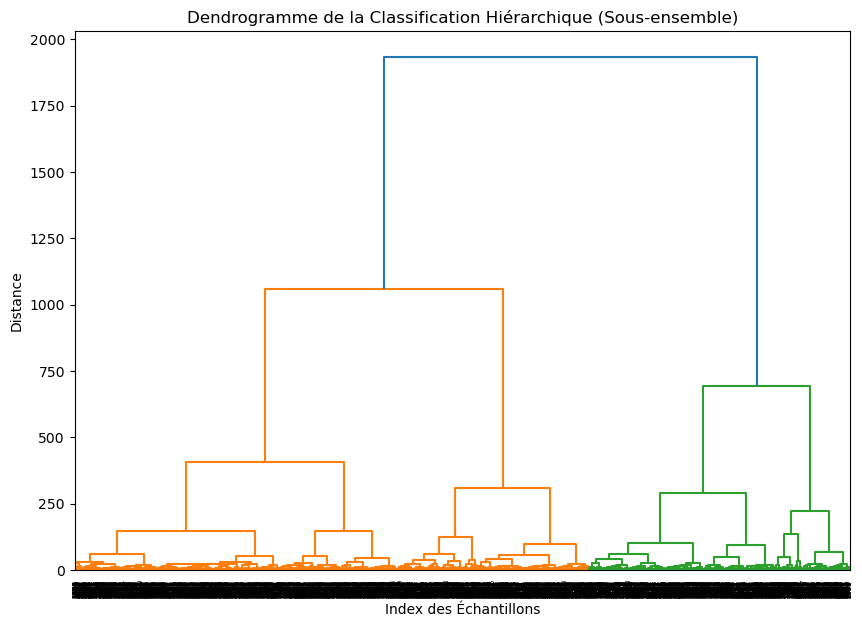

In [30]:
# Classification hiérarchique sur ce sous-ensemble
linked_sample = linkage(df_sample, method='ward')

# Affichage du dendrogramme pour le sous-ensemble
plt.figure(figsize=(10, 7))
dendrogram(linked_sample, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogramme de la Classification Hiérarchique (Sous-ensemble)')
plt.xlabel('Index des Échantillons')
plt.ylabel('Distance')
plt.show()


>Pour gérer la complexité computationnelle de la classification hiérarchique sur notre large dataset (50 005 lignes), nous avons sélectionné un échantillon représentatif de 3500 lignes. Cette approche permet une analyse plus rapide et plus efficace tout en conservant les caractéristiques essentielles de la distribution des données.

**Interpretation dendrogramme**

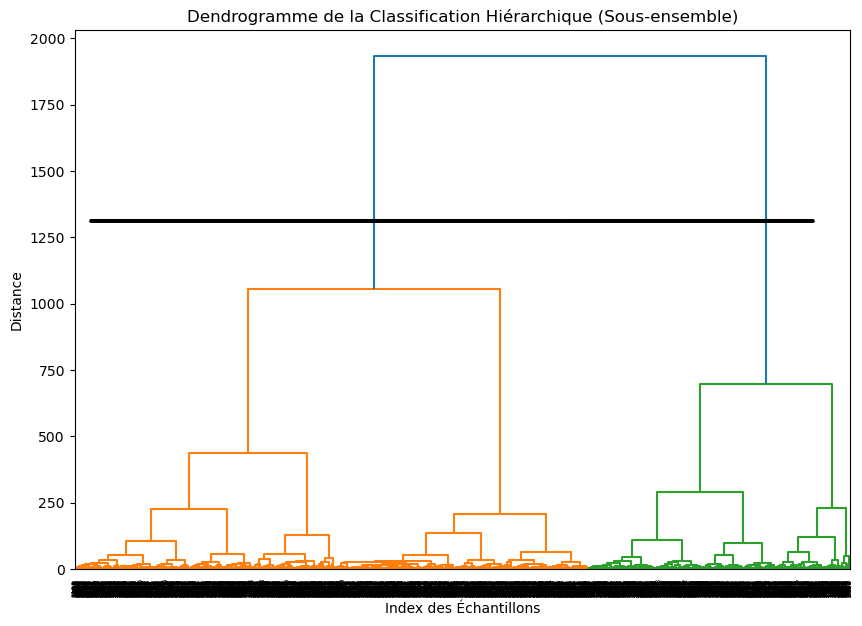

>Le dendrogramme suggère que quatre clusters fournissent une séparation claire et significative des données, avec des distances de fusion montrant des distinctions nettes entre les groupes. 


 **Classification hiérarchique agglomérative**

In [31]:
from sklearn.cluster import AgglomerativeClustering

# Créer une instance avec le nombre de clusters déterminé
agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Ajuster le modèle aux données et prédire les clusters
cluster_labels = agg_cluster.fit_predict(df_sample)

# Ajouter les étiquettes de cluster au DataFrame pour analyse
df_sample['Cluster_Hierarch'] = cluster_labels

print("Terminé")

Terminé


**Score moyen de silhouette**

In [32]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_sample.drop(['Cluster_Hierarch'], axis=1), df_sample['Cluster_Hierarch'])
print(f"Le score moyen de silhouette pour les clusters hiérarchiques est : {silhouette_avg}")


Le score moyen de silhouette pour les clusters hiérarchiques est : 0.5342797305224808


<ul>
    <li style="color:green">k=2 : 0.5357915728833219</li>
    <li>k=3 : 0.5004733012021704</li>
    <li>k=4 : 0.5277215709621763</li>
    <li>k=5 : 0.5001639225136983</li>
    <li>k=6 : 0.459685059058181</li>
    <li>k=7 : 0.4651547060646202</li>
</ul>

>Nous avons opté pour quatre clusters car le dendrogramme indiquait clairement cette segmentation et les scores de silhouette étaient comparativement élevés et proches les uns des autres, ce qui suggère que le choix de quatre ne compromet pas significativement la qualité du clustering.

## <span style="color:rgb(25,25,112)">Spectral clustering</span>

**Étape 1: Création d'un sous-ensemble de données**

In [33]:
# Sous-ensemble aléatoire de 10000 instances
df_sample = df_SPEC.sample(n=3500, random_state=42)

**Étape 2: Construction de la Matrice d'Affinité**

In [34]:
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import kneighbors_graph

affinity_matrix = kneighbors_graph(df_sample, n_neighbors=10, include_self=True, mode='connectivity', n_jobs=-1)

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


**Étape 3: Choix du Nombre de Clusters**

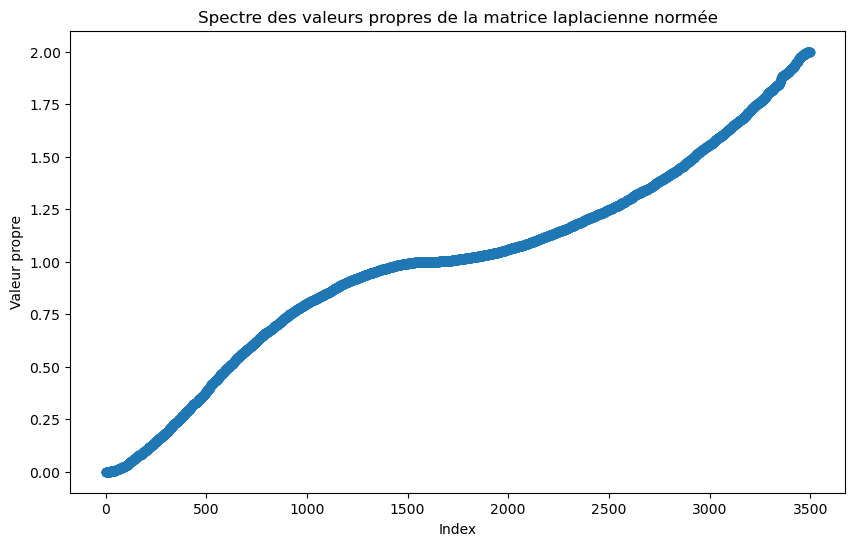

In [35]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import rbf_kernel
from scipy.sparse.csgraph import laplacian
from scipy.linalg import eigh

# Calcul de la matrice d'affinité, vous pouvez ajuster gamma en fonction de vos données
affinity_matrix = rbf_kernel(df_sample, gamma=1.0)

# Calcul de la matrice laplacienne
laplacian_matrix = laplacian(affinity_matrix, normed=True)

# Calcul des valeurs propres triées de la matrice laplacienne
eigenvalues, _ = eigh(laplacian_matrix, subset_by_index=[0, df_sample.shape[0]-1])

# Afficher les valeurs propres triées pour décider du nombre de clusters
sorted_eigenvalues = np.sort(eigenvalues)

# Tracer les valeurs propres pour visualiser le "eigengap"
plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, 'o')
plt.title("Spectre des valeurs propres de la matrice laplacienne normée")
plt.xlabel("Index")
plt.ylabel("Valeur propre")
plt.show()


>D'après la courbe des valeurs propres de la matrice laplacienne, le choix du nombre de clusters n'est pas immédiatement évident car il n'y a pas de "eigengap" marqué ou de point où un grand saut dans les valeurs propres est visible. 

**Étape 4: Application du Spectral Clustering**

In [36]:
# Application de Spectral Clustering
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
clusters_labels = sc.fit_predict(df_sample)

**Étape 5: Évaluation avec le Score de Silhouette**

In [37]:
from sklearn.metrics import silhouette_score

# Calcul du score de silhouette
silhouette_avg = silhouette_score(df_sample, clusters_labels)
print(f"Le score moyen de silhouette est : {silhouette_avg}")


Le score moyen de silhouette est : 0.5450897878252361


<ul>
    <li>k=2  : 0.5330866828604722</li>
    <li style="color:green">k=3  : 0.5450352431493932</li>
    <li>k=4  : 0.5223491023792821</li>
    <li>k=5  : 0.5047728852899933</li>
    <li>k=10 : 0.3943479401313549</li>
</ul>


**Visualisation**

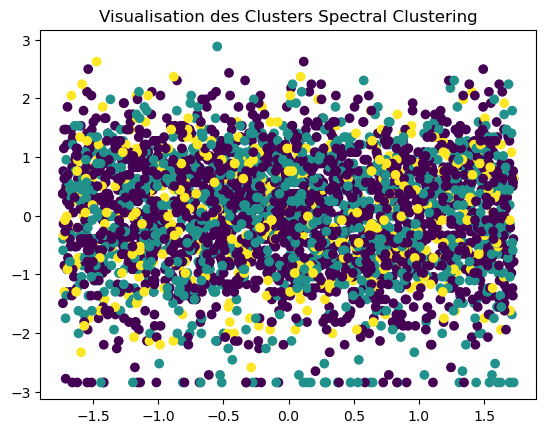

In [38]:
import matplotlib.pyplot as plt

# Affichage des points avec une couleur par cluster
plt.scatter(df_sample.iloc[:, 0], df_sample.iloc[:, 1], c=clusters_labels, cmap='viridis')
plt.title("Visualisation des Clusters Spectral Clustering")
plt.show()

<h1 style="color:rgb(25,25,112)">Analyse des Scores de Silhouette pour les Méthodes de Clustering</h1>
<h2>K-Means Clustering</h2>
<ul>
    <li>k=2 : 0.5251</li>
    <li>k=3 : 0.5541</li>
    <li>k=4 : 0.5234</li>
    <li>k=5 : 0.5048</li>
    <li>k=10 : 0.4031</li>
</ul>
<h2>Clustering Hiérarchique</h2>
<ul>
    <li>k=2 : 0.5358</li>
    <li>k=3 : 0.5005</li>
    <li>k=4 : 0.5277</li>
    <li>k=5 : 0.5002</li>
    <li>k=6 : 0.4597</li>
    <li>k=7 : 0.4652</li>
</ul>
<h2>Spectral Clustering</h2>
<ul>
    <li>k=2 : 0.5331</li>
    <li>k=3 : 0.5490</li>
    <li>k=4 : 0.5223</li>
    <li>k=5 : 0.5048</li>
    <li>k=10 : 0.3943</li>
</ul>
<h2>Interprétation</h2>
<p>
    Les scores de silhouette indiquent que pour le K-Means et le Clustering Hiérarchique, le meilleur regroupement est obtenu avec <strong>k=3 clusters</strong>, ce qui suggère une structure de données qui peut être divisée naturellement en trois groupes distincts. Pour le Spectral Clustering, malgré un score de silhouette comparable pour k=3, la visualisation des clusters ne montre pas une séparation claire, ce qui peut indiquer une distribution plus complexe des données ou une inadéquation du modèle aux spécificités du dataset.
</p>
<p>
    Ces résultats soulignent l'importance de considérer à la fois les mesures quantitatives, comme le score de silhouette, et les observations qualitatives, telles que les visualisations des données, pour évaluer la qualité du clustering.
</p>



## <span style="color:rgb(25,25,112)">Analyse en composantes principales</span>

**Data preparation**

In [51]:
file_path = "music_genre.csv"
data = pd.read_csv(file_path)

print("len data", len(data))
data.dropna(axis=0, inplace=True)
id_df = data[['instance_id']].copy() 
id_df.reset_index(drop=True, inplace=True)  # Resetting index to match the reduced dataset

data = data.select_dtypes(include=['float64', 'int64'])
omitted_col = data['instance_id']
print("len omit", len(data))
print("len omit", len(omitted_col))
data = data.drop(columns=['instance_id'])
data.head()
# instanciate scaler object
scaler = StandardScaler()
print("Missing values after dropping:", data.isnull().sum().sum())
# # fit scaler to our data
data_scaled = scaler.fit_transform(data)

len data 50005
len omit 50000
len omit 50000
Missing values after dropping: 0


**PCA algorithm application**

In [52]:
from sklearn.decomposition import PCA

# instanciate a PCA object
pca = PCA() 

# fit the object to our data
pca.fit(data_scaled)

# apply PCA to our data to get new coordinates
data_pca = pca.transform(data_scaled)

**Explained and corrected variances**

In [53]:
# Explained variance (eigenvalues)
print("Explained variance")
print(pca.explained_variance_)

# Corrected variance values 
n = len(data_pca) # number of samples
corrected_variance = (n/(n-1))*pca.explained_variance_
print("\nCorrected variance")
print(corrected_variance)

Explained variance
[3.63099752 1.27630299 1.05045842 0.97926197 0.87029458 0.7505588
 0.60413842 0.47045433 0.25689641 0.11083655]

Corrected variance
[3.63107014 1.27632852 1.05047943 0.97928156 0.87031198 0.75057381
 0.6041505  0.47046374 0.25690155 0.11083877]


#### Choice of number of commponents
**The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:**

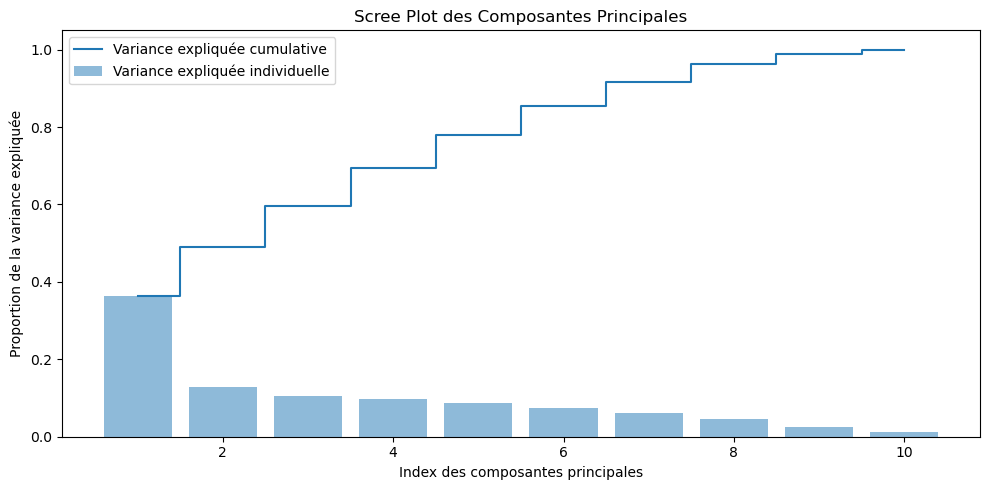

In [58]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Variance expliquée individuelle')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Variance expliquée cumulative')
plt.ylabel('Proportion de la variance expliquée')
plt.xlabel('Index des composantes principales')
plt.title('Scree Plot des Composantes Principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

>**This plot shows the variance explained by each component. The first component explains the most variance, then the second... This plot is a visual representation of the `corrected variance` we printed above.**

**Variance ratio**

In [59]:
pca.explained_variance_ratio_*100

array([36.30924899, 12.76277467, 10.50437413,  9.79242386,  8.7027717 ,
        7.50543792,  6.04126338,  4.70444924,  2.56891274,  1.10834337])

#### Using the cumulative variance to exmplain the extent to wich every PC explains the Total variance 


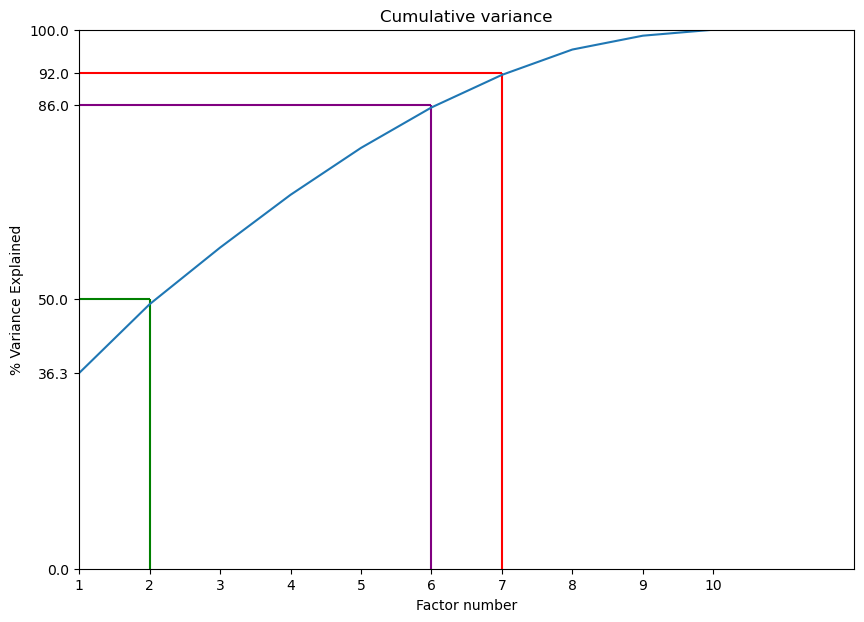

In [60]:
# plot the cumulative variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
plt.figure(figsize=(10,7))
plt.title("Cumulative variance")
plt.ylabel('% Variance Explained')
plt.xlabel('Factor number')

plt.hlines(y=92.0, xmin=0, xmax=7, color='red')
plt.vlines(x=7.0, ymin=0, ymax=92,color='red')

plt.hlines(y=86.0,xmin=0, xmax=6, color='purple')
plt.vlines(x=6.0, ymin=0, ymax=86, color='purple')

plt.hlines(y=50.0, xmin=0, xmax=2, color='green')
plt.vlines(x=2.0,ymin=0, ymax=50, color='green')

plt.ylim(0,100)
plt.xlim(1,12)
plt.yticks([0,36.3, 50, 86, 92,100])
plt.xticks([1,2,3,4,5, 6, 7, 8, 9, 10])
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)
plt.show()

#### Observation:
>As we can see on the figure in purple, 6 components are enough to explain 86% of the variance. This seems to be a good compromise: we explain most of the variance, while reducing the number of factors by almost half. 
the remainig 4 components exaplin roughly 14% of information, it means that they carry out little information compared to the other components

**HeatMap of our components**

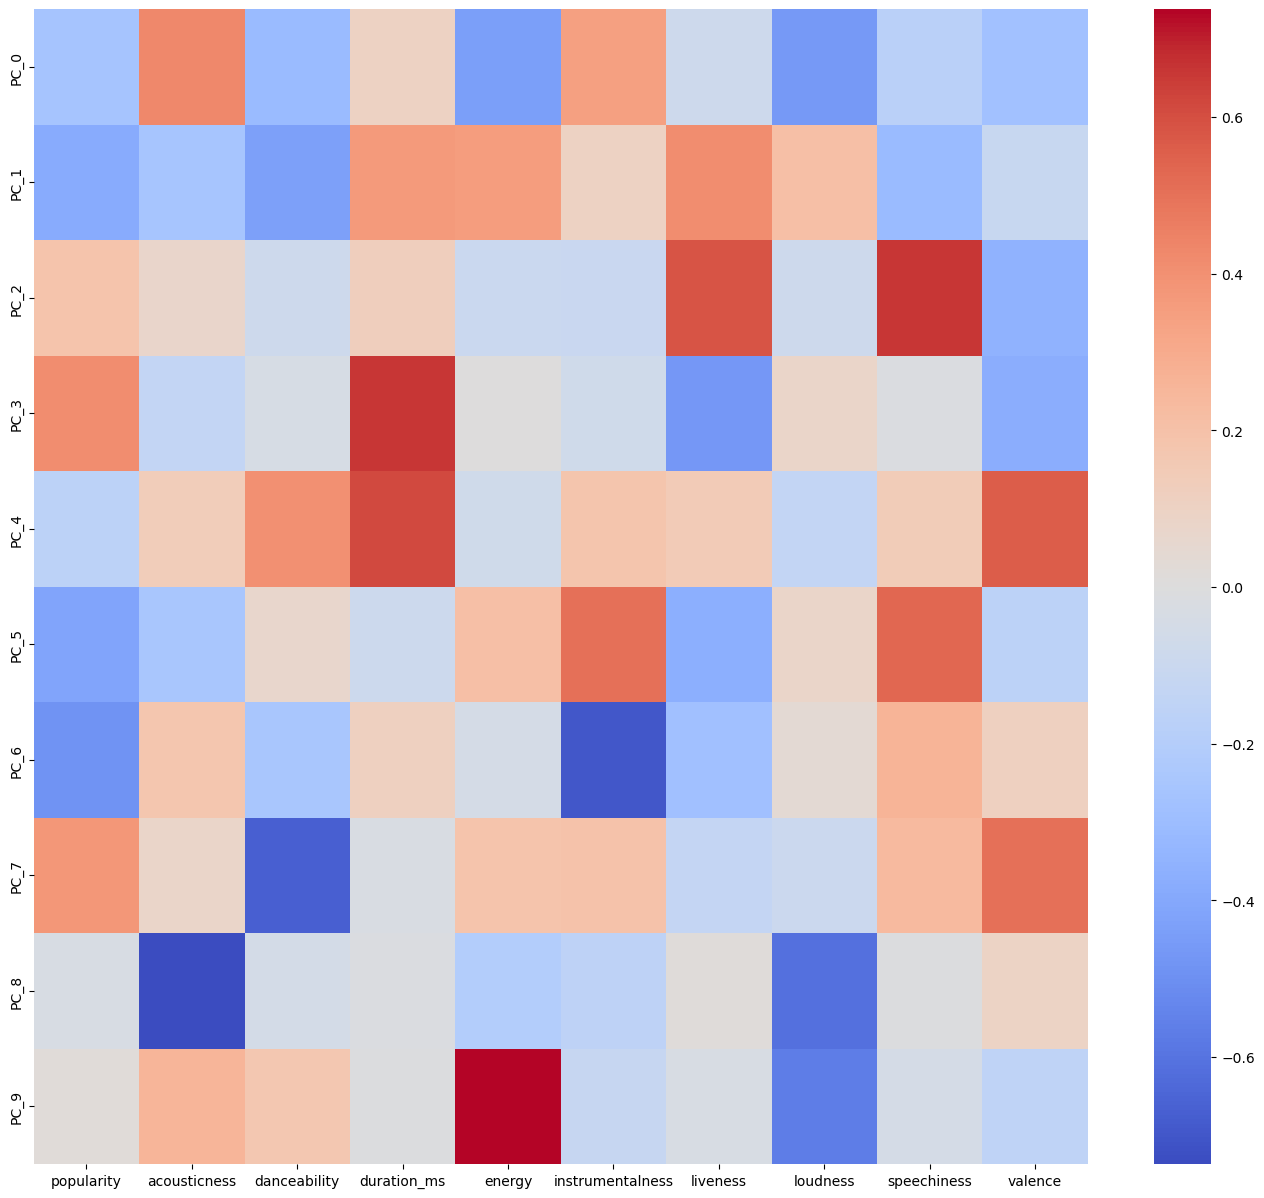

In [62]:
components = pd.DataFrame(pca.components_, columns=data.columns, index=[f"PC_{i}" for i in range(len(pca.components_))])

plt.figure(figsize=(17,15))
sns.heatmap(components,cmap='coolwarm',)
plt.show()

#### Correlation Circle coordinates

In [63]:
# Compute the correlation of the variables with the principal axes
sqrt_cor_var = np.sqrt(corrected_variance)
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

# Print the correlation matrix "variables x factors"
print(corvar)

[[-0.49446835 -0.43772313  0.19245305  0.40533558 -0.15025342 -0.36022513
  -0.37783127  0.25916897 -0.01682243  0.00762561]
 [ 0.81357574 -0.28647467  0.07692825 -0.13611598  0.12810926 -0.2143363
   0.13864136  0.05507469 -0.37356911  0.08637534]
 [-0.5965579  -0.49176397 -0.08718604 -0.03712046  0.37187092  0.05831759
  -0.19297769 -0.45879458 -0.02802252  0.05604012]
 [ 0.19376752  0.41632648  0.12565093  0.65557852  0.57468386 -0.07528461
   0.08584113 -0.01585455 -0.00650193 -0.00184555]
 [-0.83946959  0.39826941 -0.10006578  0.00122631 -0.0676898   0.18338578
  -0.03567368  0.12797961 -0.10255632  0.2455935 ]
 [ 0.65426523  0.11425817 -0.1083036  -0.07322775  0.17073815  0.43542489
  -0.54529596  0.13314735 -0.08015868 -0.03977996]
 [-0.16357309  0.46535643  0.60104411 -0.4640753   0.13893809 -0.32290888
  -0.22055441 -0.08793019  0.00801176 -0.0096565 ]
 [-0.87911234  0.2376733  -0.08565715  0.07840436 -0.12639287  0.06547982
   0.02830497 -0.06369233 -0.31104162 -0.18804514]
 

**Correlation Circle**

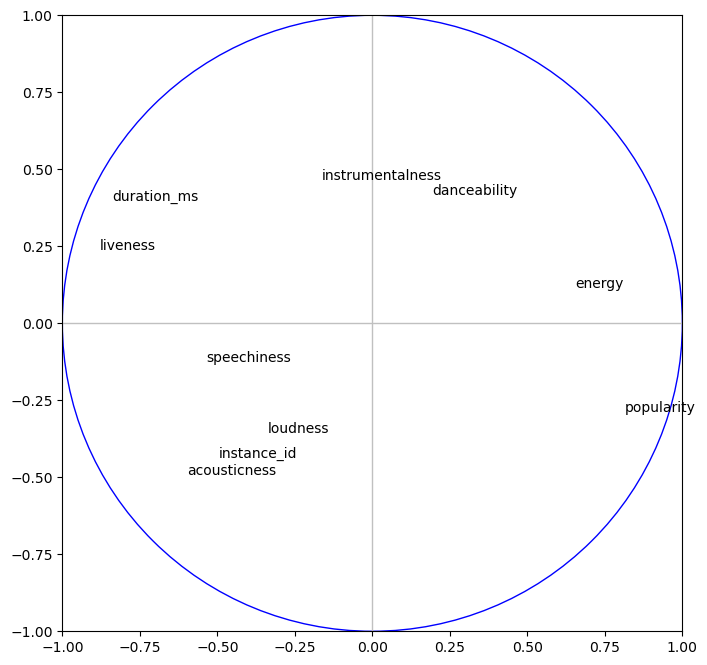

In [64]:
# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(df_ACP.columns[j],(corvar[j,0],corvar[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

#### Observation:
>As we can see on the figure, we have intrumentalness and acousticness are at the edge of the circle, we also have energy and loudness that are close to te edge but not there yet, it means that with our first and second components we can exmplain very well the intrumentalness and acousticness, we also can explain energy and loudness but it wouldn't be as accurate as the first two since they are not exactly at the edge like intrumentalness and acousticness

## <span style="color:rgb(25,25,112)">Dimensionality reduction</span>

**Once we have studied the results of PCA, decided whether reducing the dimension of our dataset was a good idea or not, and if so, how many components to keep, we can reduce the dimensionality of our dataset. It is then this reduced dataset that will be used in downstream analyses like clustering.**

In [65]:
# When we looked at cumulative variance, we decided that the first 30 components
# were enough to get a good representation of our data, so we create a new data 
# object and only keep the first 30 components as variables

data_reduc = data_pca[:,:6]

data_reduc_df = pd.concat([id_df, pd.DataFrame(data_reduc)], axis=1)

print("Missing values after dropping:", df.isnull().sum().sum())

Missing values after dropping: 0


### Next Steps:

>with the help of our new reduced dataset we will carry out further analysis like clustering to see of our data is still relevant to it's original form

## <span style="color:rgb(25,25,112)">Comparaison avec des données réduites en dimension (ACP)</span>

**Étape 1 : Charger et Préparer les Données**

In [66]:
# Charger les données réduites générées par notre fichier pca.ipynb
df_pca = pd.read_csv('df_acp_reduit.csv')


**Étape 2 : Application de K-means**

In [67]:
from sklearn.cluster import KMeans

# Meme nombre de clusters
n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Appliquez K-means aux données de l'ACP
df_pca['Cluster'] = kmeans.fit_predict(df_pca)


**Étape 3 : Visualisation des Clusters**

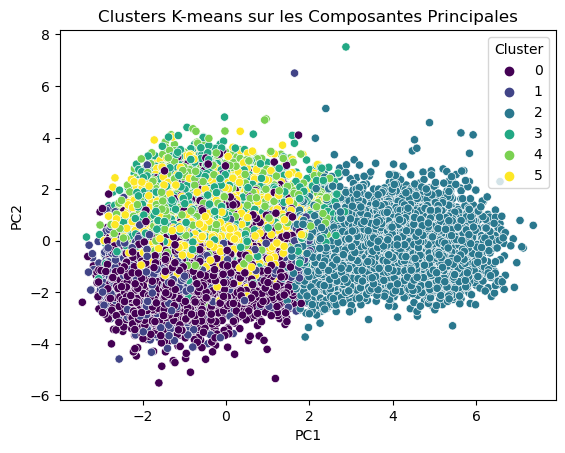

In [68]:
# Visualisez les clusters pour les deux premières composantes principales
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Clusters K-means sur les Composantes Principales')
plt.show()

**Score silhouette**

In [69]:
silhouette_avg = silhouette_score(df_pca.drop('Cluster', axis=1), df_pca['Cluster'])
print(f'Le score moyen de silhouette pour les clusters est : {silhouette_avg}')


Le score moyen de silhouette pour les clusters est : 0.2937798461339908


<ul>
  <li>k=2 : 0.13287829948945992</li>
  <li>k=3 : 0.17367665582642786</li>
  <li>k=4 : 0.2615866129358321</li>
  <li>k=5 : 0.24687505952635944</li>
  <li style="color:green">k=6 : 0.2937798461339908</li>
  <li>k=7 : 0.28292337487229186</li>
</ul>


<h1 style="color:rgb(25,25,112)" >Interprétation</h1>

Pour les données réduites par ACP, le meilleur score de silhouette est obtenu pour **k=6** clusters. Bien que ce score soit inférieur à celui obtenu avec les données non réduites, il est intéressant de noter que l'amélioration de la silhouette par rapport à des nombres inférieurs de clusters est assez significative, passant de **0.132** pour **k=2 à 0.294** pour **k=6**. Cela suggère que même si l'ACP a peut-être perdu certaines informations importantes pour le clustering, la structure de cluster reste présente dans l'espace réduit et devient plus claire à mesure que le nombre de clusters augmente jusqu'à **k=6**.

Pour les données non réduites, le score le plus élevé est atteint pour **k=3**, ce qui indique une segmentation très claire des données à ce nombre de clusters. Les scores plus élevés sur les données non réduites pourraient indiquer que l'espace de caractéristiques original a des propriétés de clustering naturelles qui sont en partie perdues après la réduction de dimensionnalité. Cela peut être dû au fait que l'ACP force les données dans un espace de plus faible dimensionnalité, ce qui pourrait fusionner certaines caractéristiques distinctives qui étaient utiles pour le clustering.

En résumé, les données non réduites montrent de meilleurs clusters selon le score de silhouette, particulièrement pour un plus petit nombre de clusters. Cependant, pour les données réduites, augmenter le nombre de clusters semble améliorer la distinction entre eux jusqu'à un certain point.



## <span style="color:rgb(25,25,112)">Analyse en Composantes Canoniques</span>


**Séparation du dataframe en deux ensembles de variables X et Y.**

In [72]:
df = df_ACC
df.drop(['instance_id'], axis=1, inplace=True)

X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]
Y = df.drop(['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo'], axis=1)

**Application de l'ACC**

In [73]:
from sklearn.cross_decomposition import CCA

# Le nombre de composantes est généralement le rang le plus bas entre X et Y
n_components = min(X.shape[1], Y.shape[1])

cca = CCA(n_components=n_components)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)


**Corrélation entre les ensembles de composantes canoniques**

In [74]:
correlations = np.corrcoef(X_c.T, Y_c.T)[:n_components, n_components:]
print("Corrélations entre les composantes canoniques :")
print(correlations)


Corrélations entre les composantes canoniques :
[[ 6.48163035e-01  1.55062824e-16  2.44277638e-16  3.39736057e-16
   5.10778306e-16  4.22882857e-16 -1.14750532e-16  2.17815479e-16]
 [ 6.48877362e-05  3.56081847e-01  9.05096079e-17 -7.91466375e-17
  -1.84283809e-16 -4.43393094e-16  8.95320578e-17 -9.85539836e-17]
 [-2.03141324e-08 -8.69845149e-05  1.71815425e-01 -1.16393189e-16
  -1.07670209e-16 -2.53094406e-16 -2.14902161e-16 -9.89003725e-17]
 [-1.78530677e-10 -9.01011699e-07 -5.40760049e-05  1.06143120e-01
   1.53369740e-16  3.58923518e-16  0.00000000e+00  1.47074092e-16]
 [-8.61745483e-14 -4.70108452e-10  5.44095543e-09 -9.13547422e-06
   4.64741231e-02 -4.64243092e-18 -3.49970839e-18 -7.74571346e-17]
 [-1.62168164e-14 -7.83888909e-11  5.14990099e-10 -9.13906287e-07
  -2.93525831e-05  3.60328867e-02 -7.82257039e-17  3.72409511e-17]
 [-5.19092596e-17 -1.89320247e-12  8.01379762e-12 -1.46810022e-08
   1.55370298e-08 -1.94140317e-05  2.97626972e-02 -1.25199292e-17]
 [-2.31787942e-16 -1.

>En analysant notre dataset via l'Analyse en Composantes Canoniques, nous avons identifié une corrélation significative entre les caractéristiques des morceaux de musique et leur réception par le public, particulièrement mise en évidence par les deux premières paires de composantes canoniques. Cette forte corrélation pour la première paire (0.648) et une corrélation notable pour la deuxième (0.356) révèlent des interactions intéressantes qui méritent une exploration plus approfondie. Ces résultats nous encouragent à examiner plus en détail les caractéristiques qui influencent le plus la popularité des morceaux, nous offrant ainsi des insights précieux pour guider la création et la promotion de la musique à l'avenir.

**Visualisation des Scores Canoniques**

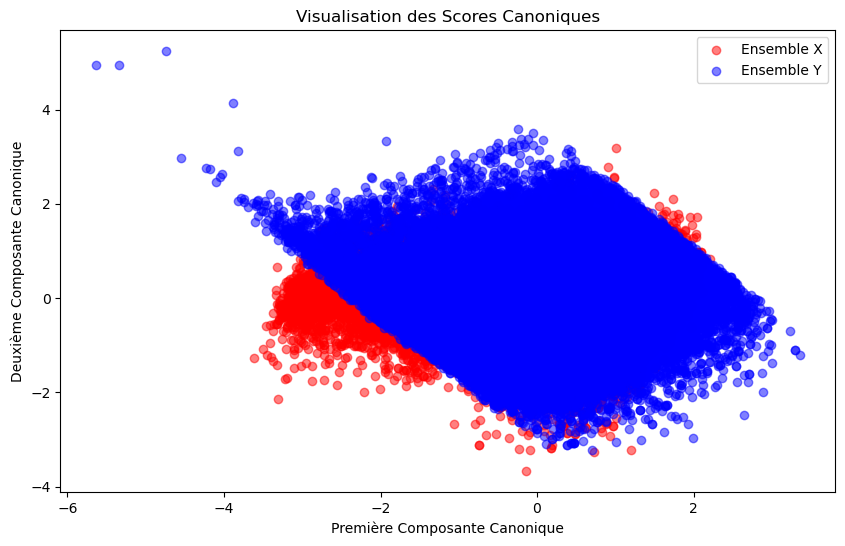

In [75]:
# Projections des ensembles X et Y sur l'espace des composantes canoniques
X_c, Y_c = cca.transform(X, Y)

plt.figure(figsize=(10, 6))

# Diagramme de dispersion pour les scores canoniques du premier ensemble
plt.scatter(X_c[:, 0], X_c[:, 1], color='red', alpha=0.5, label='Ensemble X')

# Diagramme de dispersion pour les scores canoniques du deuxième ensemble
plt.scatter(Y_c[:, 0], Y_c[:, 1], color='blue', alpha=0.5, label='Ensemble Y')

plt.title('Visualisation des Scores Canoniques')
plt.xlabel('Première Composante Canonique')
plt.ylabel('Deuxième Composante Canonique')
plt.legend()
plt.show()


**Calcul des Scores et visualisation des orrélations**

In [76]:
# Initialisation et ajustement de la CCA
cca = CCA(n_components=2)
cca.fit(X, Y)

# Obtention des scores transformés
U_, V_ = cca.transform(X, Y)


# Calcul de la corrélation entre les scores
corr_cca = pd.DataFrame(np.corrcoef(U_.T, V_.T), index=["$U_1$", "$U_2$", "$V_1$", "$V_2$"], columns=["$U_1$", "$U_2$", "$V_1$", "$V_2$"])
corr_cca.style.background_gradient(cmap='coolwarm')


,$U_1$,$U_2$,$V_1$,$V_2$
$U_1$,1.000000,-0.000000,0.648163,0.000000
$U_2$,-0.000000,1.000000,0.000065,0.356082
$V_1$,0.648163,0.000065,1.000000,0.000000
$V_2$,0.000000,0.356082,0.000000,1.000000


In [77]:
score_corr = np.round(corr_cca.loc["$U_1$", "$V_1$"], decimals=3)
print("Corrélation entre $U_1$ et $V_1$: ", score_corr)

Corrélation entre $U_1$ et $V_1$:  0.648


>La corrélation de 0.648 entre les premières composantes canoniques U1 et V1 est significative, révélant que les variations dans l'ensemble de données X sont bien reflétées et correspondantes aux variations dans l'ensemble de données Y pour ces composantes spécifiques.

**Cercle de corrélation**

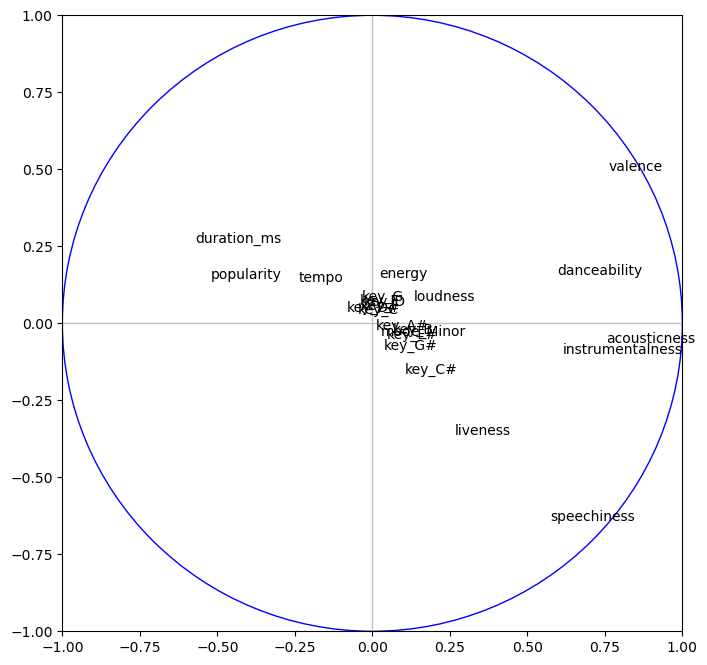

In [78]:
# Concaténation des datasets X et Y
scaled_data = np.concatenate((X, Y), axis=1)


# Conversion en DataFrame pour une utilisation plus aisée
column_names = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor']
scaled_data = pd.DataFrame(scaled_data, columns=column_names)


# Calcul de C1 et C2 comme moyennes des scores U_ et V_
C1 = np.array((1/2)*(U_[:,0] + V_[:,0]))
C2 = np.array((1/2)*(U_[:,1] + V_[:,1]))
Caxes = np.array([C1, C2])


# Calcul de la corrélation des variables avec les axes C1 et C2
corvar = np.corrcoef(Caxes, scaled_data.T)[:2, 2:]  


fig, axes = plt.subplots(figsize=(8, 8))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Annotation des variables avec leurs coordonnées
for j in range(scaled_data.shape[1]):
    plt.annotate(scaled_data.columns[j], (corvar[0, j], corvar[1, j]))

# Ajout des axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Ajout d'un cercle
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
axes.add_artist(cercle)

# Affichage du cercle de corrélation
plt.show()


In [79]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
count,5.000500e+04,5.000500e+04,5.000500e+04,5.000500e+04,5.000500e+04,5.000500e+04,5.000500e+04,5.000500e+04,5.000500e+04,50005.000000,...,50005.000000,50005.000000,50005.000000,50005.000000,50005.000000,50005.000000,50005.000000,50005.000000,50005.000000,50005.000000
mean,9.792178e-15,-1.597174e-15,2.890066e-16,-1.471731e-15,1.836012e-15,-1.394696e-14,-4.141739e-16,-2.029529e-16,9.559019e-16,119.957650,...,0.110429,0.108089,0.105289,0.031797,0.075192,0.086811,0.062014,0.114629,0.066373,0.357984
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,29.074246,...,0.313427,0.310496,0.306929,0.175461,0.263704,0.281561,0.241183,0.318576,0.248936,0.479412
min,-2.845395e+00,-8.975842e-01,-2.791616e+00,-1.719619e+00,-2.264151e+00,-5.580379e-01,-1.139770e+00,-6.151970e+00,-7.031997e-01,34.347000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.576441e-01,-8.386958e-01,-6.507732e-01,-3.610281e-01,-6.303650e-01,-5.580379e-01,-6.000766e-01,-2.799810e-01,-5.670622e-01,96.777000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.015753e-02,-4.756969e-01,5.463001e-02,-1.532210e-02,1.634546e-01,-5.575524e-01,-4.200344e-01,3.013437e-01,-4.407897e-01,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.579591e-01,7.196504e-01,7.208441e-01,3.679934e-01,8.136306e-01,-8.169324e-02,3.100335e-01,6.426743e-01,4.851620e-02,139.465000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.524820e+00,2.020470e+00,2.394777e+00,3.582467e+01,1.509168e+00,2.502861e+00,4.987418e+00,2.089617e+00,8.369676e+00,220.276000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# <span style="color:rgb(112, 41, 99)">Conclusion</span>

>L'analyse du cercle de corrélation révèle que des attributs comme la valence, la speechiness, et l'acousticness démontrent une corrélation modérée à forte avec nos composantes canoniques, suggérant que ces caractéristiques sont particulièrement saillantes dans la relation étudiée. La proximité de la duration_ms et de la popularité vers le milieu du cercle, mais légèrement en dehors du centre, indique une influence mesurée sur nos composantes, soulignant une association moins directe mais toujours présente. En revanche, les variables encodées telles que les tonalités (key_A#, key_B, etc.) sont regroupées vers le centre, signalant une contribution relativement faible à la variation expliquée par les composantes canoniques, ce qui est cohérent avec leur nature catégorielle et binaire.